# Titanic: Machine Learning from Disaster
### Predict survival on the Titanic
- Defining the problem statement
- Collecting the data
- Exploratory data analysis
- Feature engineering
- Modelling
- Testing

## 1. Defining the problem statement
Complete the analysis of what sorts of people were likely to survive.  
In particular, we ask you to apply the tools of machine learning to predict which passengers survived the Titanic tragedy.

In [486]:
import warnings; warnings.simplefilter('ignore')

from IPython.display import Image
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/5095eabce4b06cb305058603/5095eabce4b02d37bef4c24c/1352002236895/100_anniversary_titanic_sinking_by_esai8mellows-d4xbme8.jpg")

## 2. Collecting the data

training data set and testing data set are given by Kaggle
you can download from  
my github [https://github.com/minsuk-heo/kaggle-titanic/tree/master](https://github.com/minsuk-heo/kaggle-titanic)  
or you can download from kaggle directly [kaggle](https://www.kaggle.com/c/titanic/data)  

### load train, test dataset using Pandas

In [487]:
import pandas as pd

train = pd.read_csv('input/train.csv')
test = pd.read_csv('input/test.csv')

## 3. Exploratory data analysis
Printing first 5 rows of the train dataset.

In [488]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Data Dictionary
- Survived: 	0 = No, 1 = Yes  
- pclass: 	Ticket class	1 = 1st, 2 = 2nd, 3 = 3rd  	
- sibsp:	# of siblings / spouses aboard the Titanic  	
- parch:	# of parents / children aboard the Titanic  	
- ticket:	Ticket number	
- cabin:	Cabin number	
- embarked:	Port of Embarkation	C = Cherbourg, Q = Queenstown, S = Southampton  

**Total rows and columns**

We can see that there are 891 rows and 12 columns in our training dataset.

In [489]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [490]:
train.shape

(891, 12)

In [491]:
test.shape

(418, 11)

In [492]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [493]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null object
Fare           417 non-null float64
Cabin          91 non-null object
Embarked       418 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


We can see that *Age* value is missing for many rows. 

Out of 891 rows, the *Age* value is present only in 714 rows.

Similarly, *Cabin* values are also missing in many rows. Only 204 out of 891 rows have *Cabin* values.

In [494]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [495]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

There are 177 rows with missing *Age*, 687 rows with missing *Cabin* and 2 rows with missing *Embarked* information.

### import python lib for visualization

In [496]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set() # setting seaborn default for plots

### Bar Chart for Categorical Features
- Pclass
- Sex
- SibSp ( # of siblings and spouse)
- Parch ( # of parents and children)
- Embarked
- Cabin

In [497]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

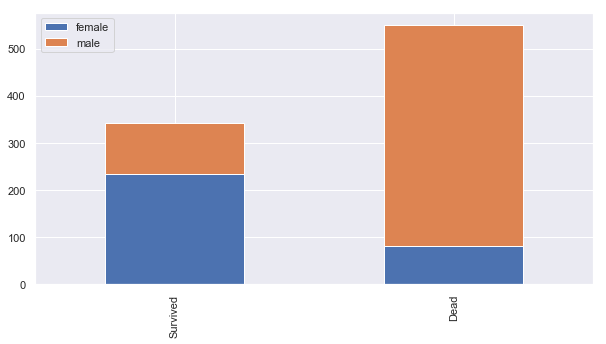

In [498]:
bar_chart('Sex')

The Chart confirms **Women** more likely survivied than **Men**

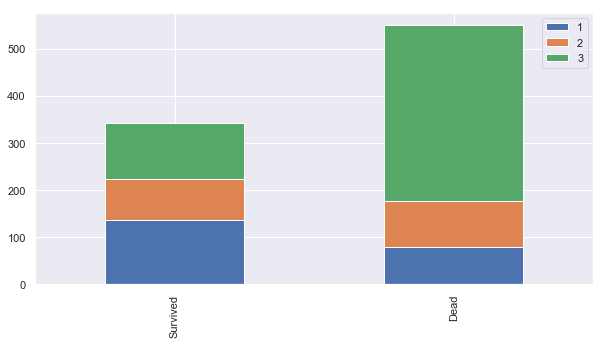

In [499]:
bar_chart('Pclass')

The Chart confirms **1st class** more likely survivied than **other classes**  
The Chart confirms **3rd class** more likely dead than **other classes**

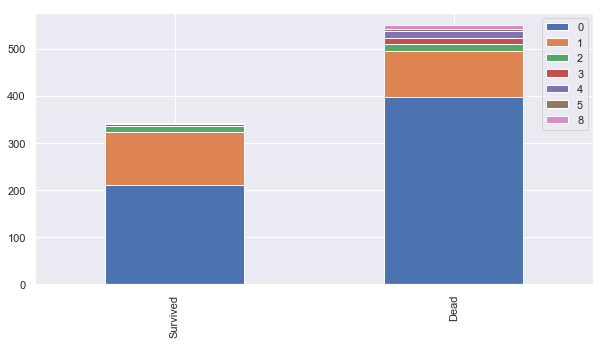

In [500]:
bar_chart('SibSp')

The Chart confirms **a person aboarded with more than 2 siblings or spouse** more likely survived  
The Chart confirms ** a person aboarded without siblings or spouse** more likely dead

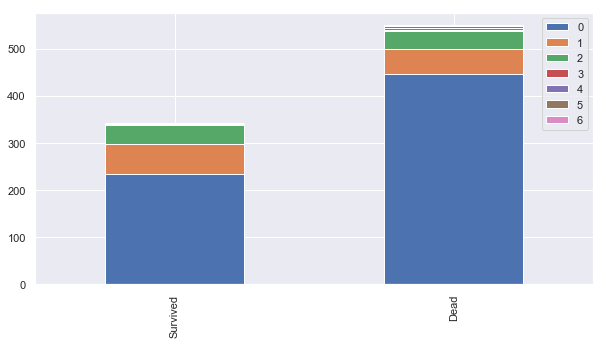

In [501]:
bar_chart('Parch')

The Chart confirms **a person aboarded with more than 2 parents or children** more likely survived  
The Chart confirms ** a person aboarded alone** more likely dead

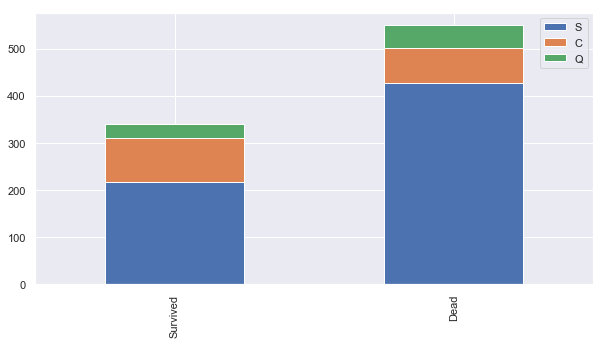

In [502]:
bar_chart('Embarked')

The Chart confirms **a person aboarded from C** slightly more likely survived  
The Chart confirms **a person aboarded from Q** more likely dead  
The Chart confirms **a person aboarded from S** more likely dead

## 4. Feature engineering

Feature engineering is the process of using domain knowledge of the data  
to create features (**feature vectors**) that make machine learning algorithms work.  

feature vector is an n-dimensional vector of numerical features that represent some object.  
Many algorithms in machine learning require a numerical representation of objects,  
since such representations facilitate processing and statistical analysis.

In [503]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.1 how titanic sank?
sank from the bow of the ship where third class rooms located  
conclusion, Pclass is key feature for classifier

In [504]:
Image(url= "https://static1.squarespace.com/static/5006453fe4b09ef2252ba068/t/5090b249e4b047ba54dfd258/1351660113175/TItanic-Survival-Infographic.jpg?format=1500w")

In [505]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### 4.2 Name

In [506]:
train_test_data = [train, test] # combining train and test dataset

for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract('([A-Za-z]+)\.', expand=False)

In [507]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Major         2
Mlle          2
Col           2
Countess      1
Don           1
Sir           1
Ms            1
Lady          1
Capt          1
Jonkheer      1
Mme           1
Name: Title, dtype: int64

In [508]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Ms          1
Dr          1
Dona        1
Name: Title, dtype: int64

#### Title map
Mr : 0  
Miss : 1  
Mrs: 2  
Others: 3


In [509]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

In [510]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0


In [511]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,2


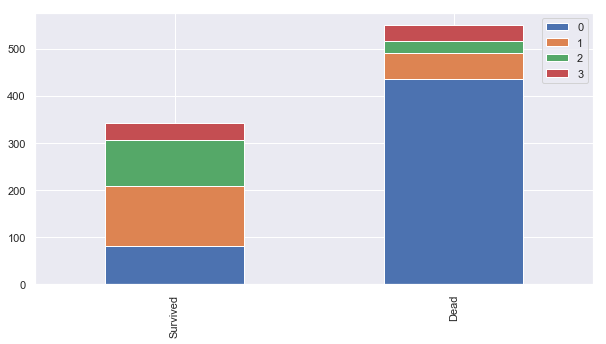

In [512]:
bar_chart('Title')

In [513]:
# delete unnecessary feature from dataset
train.drop('Name', axis=1, inplace=True)
test.drop('Name', axis=1, inplace=True)

In [514]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [515]:
test.head()

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,female,47.0,1,0,363272,7.0000,NaN,S,2
2,894,2,male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,female,22.0,1,1,3101298,12.2875,NaN,S,2


### 4.3 Sex

male: 0
female: 1

In [516]:
sex_mapping = {"male": 0, "female": 1}
for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

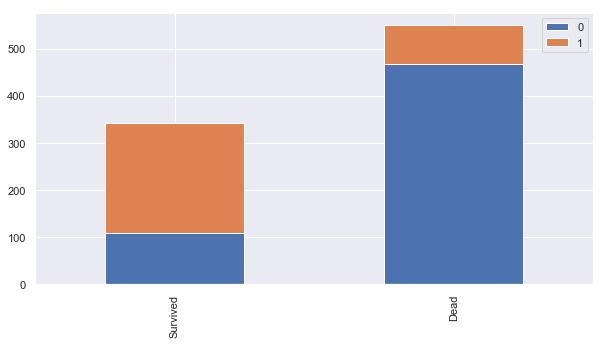

In [517]:
bar_chart('Sex')

### 4.4 Age

#### 4.4.1 some age is missing
Let's use Title's median age for missing Age

In [518]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


In [519]:
# fill missing age with median age for each title (Mr, Mrs, Miss, Others)
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [520]:
train.head(5)
#train.groupby("Title")["Age"].transform("median")

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,35.0,0,0,373450,8.0500,NaN,S,0


#### 4.4.2 Binning
Binning/Converting Numerical Age to Categorical Variable  

feature vector map:  
child: 0  
young: 1  
adult: 2  
mid-age: 3  
senior: 4

In [521]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0,
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1,
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2,
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3,
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4
    


In [522]:
train.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


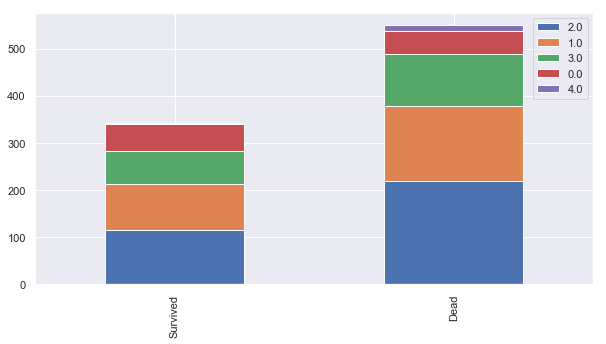

In [523]:
bar_chart('Age')

### 4.5 Embarked

#### 4.5.1 filling missing values

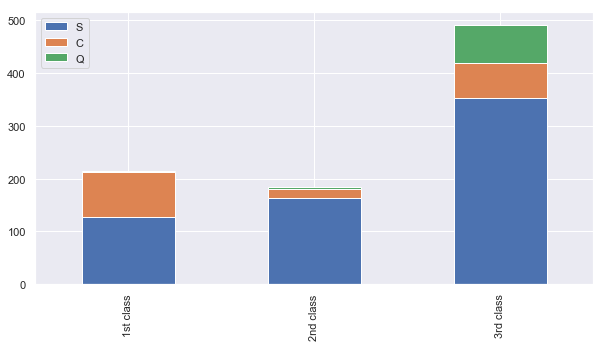

In [524]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

more than 50% of 1st class are from S embark  
more than 50% of 2nd class are from S embark  
more than 50% of 3rd class are from S embark

**fill out missing embark with S embark**

In [525]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

In [526]:
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,S,0


In [527]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

### 4.6 Fare

In [528]:
# fill missing Fare with median fare for each Pclass
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)
train.head(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,0,2.0,0,0,373450,8.0500,NaN,0,0


In [529]:
for dataset in train_test_data:
    
    dataset.loc[ dataset['Fare'] <= 17.00, 'Fare'] = 0,
    dataset.loc[(dataset['Fare'] > 17.00) & (dataset['Fare'] <= 30.00), 'Fare'] = 1,
    dataset.loc[(dataset['Fare'] > 30.00) & (dataset['Fare'] <= 100.00), 'Fare'] = 2,
    dataset.loc[ dataset['Fare'] > 100.00, 'Fare'] = 3
    
   

### 4.7 Cabin

In [530]:
#train.Cabin.value_counts()

In [531]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

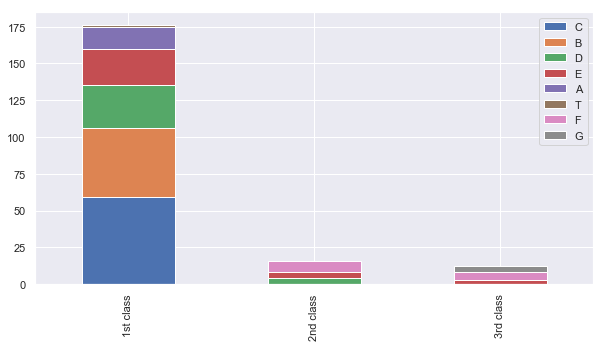

In [532]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [533]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

In [534]:
# fill missing Fare with median fare for each Pclass
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

### 4.8 FamilySize

In [535]:
train["FamilySize"] = train["SibSp"] + train["Parch"] + 1
test["FamilySize"] = test["SibSp"] + test["Parch"] + 1

In [536]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['FamilySize'] = dataset['FamilySize'].map(family_mapping)

In [537]:
features_drop = ['Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train.to_csv('Round1_train_data.csv',index=False)
test.to_csv('Round1_test_data.csv',index=False)
#train = train.drop(['PassengerId'], axis=1)

In [538]:
train_data = train
target = train['Survived']

train_data.shape, target.shape

((891, 10), (891,))

In [539]:
train_data.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,FamilySize
0,1,0,3,0,1.0,0.0,2.0,0,0,0.4
1,2,1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,3,1,1.0,0.0,2.0,0,1,0.0
3,4,1,1,1,2.0,2.0,0.8,0,2,0.4
4,5,0,3,0,2.0,0.0,2.0,0,0,0.0
5,6,0,3,0,2.0,0.0,2.0,2,0,0.0
6,7,0,1,0,3.0,2.0,1.6,0,0,0.0
7,8,0,3,0,0.0,1.0,2.0,0,3,1.6
8,9,1,3,1,2.0,0.0,2.0,0,2,0.8
9,10,1,2,1,0.0,2.0,1.8,1,2,0.4


## 5. Modelling

In [540]:
# Importing Classifier Modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
import numpy as np

In [541]:
test_data=test.drop("PassengerId", axis=1).copy()

## 7. Testing

In [542]:
Round1_train_data=train_data
target=train['Survived']
Round1_train_data=Round1_train_data.drop(['Survived','PassengerId'],axis=1)
Round1_test_data = test_data.copy()

clf = SVC()
clf.fit(Round1_train_data, target)
prediction_SVC = clf.predict(Round1_test_data)

clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(Round1_train_data, target)
prediction_KNC = clf.predict(Round1_test_data)

clf = DecisionTreeClassifier()
clf.fit(Round1_train_data, target)
prediction_DTC = clf.predict(Round1_test_data)

clf = RandomForestClassifier(n_estimators=13)
clf.fit(Round1_train_data, target)
prediction_RFC = clf.predict(Round1_test_data)

clf = GaussianNB()
clf.fit(Round1_train_data, target)
prediction_GNB = clf.predict(Round1_test_data)
submission = test
submission["prediction_SVC"]= prediction_SVC
submission["prediction_KNC"]= prediction_KNC
submission["prediction_DTC"]= prediction_DTC
submission["prediction_RFC"]= prediction_RFC
submission["prediction_GNB"]= prediction_GNB
submission['TotalCount']=submission['prediction_SVC']+submission['prediction_KNC']+submission['prediction_DTC']+submission['prediction_RFC']+submission['prediction_GNB']
submission['TotalCount-GNB']=submission['TotalCount']-submission['prediction_GNB']
Round1_final_submission= submission.loc[(submission["TotalCount"]==5) | (submission["TotalCount"]==0)| (submission["TotalCount-GNB"]==0)]
final_submission=pd.DataFrame(
{
    'PassengerId': Round1_final_submission['PassengerId'],
    'Prediction': Round1_final_submission['prediction_SVC']
})
final_submission.to_csv('Round1_final_submission.csv', index=False)

Testing Round 2

In [543]:
#Preparing Data for next round
Round2_test_data= submission.loc[(submission["TotalCount"]<5) & (submission["TotalCount"]>0) & (submission["TotalCount-GNB"]>0)]
Round2_test_data.to_csv('Round2_test_data.csv',index=False)
Round2_train_data=submission.loc[(submission["TotalCount"]==5) | (submission["TotalCount"]==0) | (submission["TotalCount-GNB"]==0)]

# Adding the already predicted values to the training dataset
Round2_train_data=Round2_train_data.drop(['PassengerId','prediction_KNC','prediction_DTC','prediction_RFC','prediction_GNB','TotalCount','TotalCount-GNB'],axis=1)
Round2_train_data=Round2_train_data.rename(index=str, columns={"prediction_SVC": "Survived"})
Round1_train_data=pd.read_csv('Round1_train_data.csv').drop(['PassengerId'],axis=1)
frames = [Round1_train_data, Round2_train_data]
Round2_train_data=pd.concat(frames,sort=True)
Round2_train_data.to_csv('Round2_train_data.csv',index=False)
Round2_test_data.drop(['prediction_SVC','prediction_KNC','prediction_DTC','prediction_RFC','prediction_GNB','TotalCount','TotalCount-GNB'],axis=1,inplace=True)
#testing
clf = SVC()
train_data=Round2_train_data
target=train_data['Survived']
train_data=train_data.drop(['Survived'],axis=1)
clf.fit(train_data, target)
test_data = Round2_test_data.copy()
test_data = test_data.drop(['PassengerId'],axis=1)
prediction_SVC = clf.predict(test_data)

clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(train_data, target)
prediction_KNC = clf.predict(test_data)

clf = DecisionTreeClassifier()
clf.fit(train_data, target)
prediction_DTC = clf.predict(test_data)

clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)
prediction_RFC = clf.predict(test_data)

clf = GaussianNB()
clf.fit(train_data, target)
prediction_GNB = clf.predict(test_data)

submission = Round2_test_data
submission["prediction_SVC"]= prediction_SVC
submission["prediction_KNC"]= prediction_KNC
submission["prediction_DTC"]= prediction_DTC
submission["prediction_RFC"]= prediction_RFC
submission["prediction_GNB"]= prediction_GNB

submission['TotalCount']=submission['prediction_SVC']+submission['prediction_KNC']+submission['prediction_DTC']+submission['prediction_RFC']+submission['prediction_GNB']
submission['TotalCount-GNB']=submission['TotalCount']-submission['prediction_GNB']
Round2_final_submission= submission.loc[(submission["TotalCount"]==5) | (submission["TotalCount"]==0)| (submission["TotalCount-GNB"]==0)]
final_submission=pd.DataFrame(
{
    'PassengerId': Round2_final_submission['PassengerId'],
    'Prediction': Round2_final_submission['prediction_SVC']
})

final_submission.to_csv('Round2_final_submission.csv', index=False)

Round 3

In [544]:
#Preparing Data for next round
Round3_test_data= submission.loc[(submission["TotalCount"]<5) & (submission["TotalCount"]>0) & (submission["TotalCount-GNB"]>0)]
Round3_test_data.to_csv('Round3_test_data.csv',index=False)
Round3_train_data=submission.loc[(submission["TotalCount"]==5) | (submission["TotalCount"]==0) | (submission["TotalCount-GNB"]==0)]
# Adding the already predicted values to the training dataset
Round3_train_data=Round3_train_data.drop(['PassengerId','prediction_KNC','prediction_DTC','prediction_RFC','prediction_GNB','TotalCount','TotalCount-GNB'],axis=1)
Round3_train_data=Round3_train_data.rename(index=str, columns={"prediction_SVC": "Survived"})
Round2_train_data=pd.read_csv('Round2_train_data.csv')
Round2_train_data=Round2_train_data.rename(index=str, columns={"prediction_SVC": "Survived"})
frames = [Round2_train_data, Round3_train_data]
Round3_train_data=pd.concat(frames,sort=True)
Round3_train_data.to_csv('Round3_train_data.csv',index=False)
Round3_test_data.drop(['prediction_SVC','prediction_KNC','prediction_DTC','prediction_RFC','prediction_GNB','TotalCount','TotalCount-GNB'],axis=1,inplace=True)
#testing
clf = SVC()
train_data=Round3_train_data
target=train_data['Survived']
train_data=train_data.drop(['Survived'],axis=1)
clf.fit(train_data, target)
test_data = Round3_test_data.copy()
test_data = test_data.drop(['PassengerId'],axis=1)
prediction_SVC = clf.predict(test_data)

clf = KNeighborsClassifier(n_neighbors = 13)
clf.fit(train_data, target)
prediction_KNC = clf.predict(test_data)

clf = DecisionTreeClassifier()
clf.fit(train_data, target)
prediction_DTC = clf.predict(test_data)

clf = RandomForestClassifier(n_estimators=13)
clf.fit(train_data, target)
prediction_RFC = clf.predict(test_data)

clf = GaussianNB()
clf.fit(train_data, target)
prediction_GNB = clf.predict(test_data)

submission = Round3_test_data
submission["prediction_SVC"]= prediction_SVC
submission["prediction_KNC"]= prediction_KNC
submission["prediction_DTC"]= prediction_DTC
submission["prediction_RFC"]= prediction_RFC
submission["prediction_GNB"]= prediction_GNB

submission['TotalCount']=submission['prediction_SVC']+submission['prediction_KNC']+submission['prediction_DTC']+submission['prediction_RFC']+submission['prediction_GNB']
submission['TotalCount-GNB']=submission['TotalCount']-submission['prediction_GNB']
Round3_final_submission= submission.loc[(submission["TotalCount"]==5) | (submission["TotalCount"]==0)| (submission["TotalCount-GNB"]==0)]
final_submission=pd.DataFrame(
{
    'PassengerId': Round3_final_submission['PassengerId'],
    'Prediction': Round3_final_submission['prediction_SVC']
})

final_submission.to_csv('Round3_final_submission.csv', index=False)

Round 3 could not find any 5 or 0

In [564]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

clf = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# kNN Score
knc = round(np.mean(score)*100, 2)

clf = DecisionTreeClassifier()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# decision tree Score
dtc = round(np.mean(score)*100, 2)

clf = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
rfc = round(np.mean(score)*100, 2)

clf = GaussianNB()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
# Naive Bayes Score
gnb = round(np.mean(score)*100, 2)

clf = SVC()
scoring = 'accuracy'
score = cross_val_score(clf, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
svc = round(np.mean(score)*100,2)

print (' svc='+ str(svc)+' gnb='+ str(gnb)+' rfc='+ str(rfc)+' dtc='+ str(dtc)+' knc='+ str(knc))

 svc=87.16 gnb=80.2 rfc=87.4 dtc=85.91 knc=86.93


In [ ]:
SVC is selected

In [ ]:
predicted last 33 rows with avrage of 5 models. with possible values 1,2,3,4--> 1,2 are dead while 3,4 are alive

In [569]:
frames = [pd.read_csv('Round1_final_submission.csv'),pd.read_csv('Round2_final_submission.csv'),pd.read_csv('Round3_final_submission.csv'),pd.read_csv('Round4_final_submission.csv'),pd.read_csv('Round5_final_submission.csv'),pd.read_csv('Round6_final_submission.csv')]
Kaggle_Submission=pd.concat(frames,sort=True)
Kaggle_Submission.to_csv('Kaggle_submission.csv', index=False)